In [1]:
import torch
from PIL import Image
from transformers.utils.import_utils import is_flash_attn_2_available

from colpali_engine.models import ColQwen2, ColQwen2Processor


In [2]:
model_name = "vidore/colqwen2-v1.0"

model = ColQwen2.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="cuda:0",  # or "mps" if on Apple Silicon
    attn_implementation="flash_attention_2" if is_flash_attn_2_available() else None,
).eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


adapter_config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/74.0M [00:00<?, ?B/s]

In [3]:
print(model)

ColQwen2(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linea

In [5]:
processor = ColQwen2Processor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

In [6]:
print(processor)

ColQwen2Processor:
- image_processor: Qwen2VLImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "Qwen2VLImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "max_pixels": 602112,
  "merge_size": 2,
  "min_pixels": 3136,
  "patch_size": 14,
  "processor_class": "ColQwen2Processor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "longest_edge": 602112,
    "shortest_edge": 3136
  },
  "temporal_patch_size": 2
}

- tokenizer: Qwen2TokenizerFast(name_or_path='vidore/colqwen2-v1.0', vocab_size=151643, model_max_length=32768, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<

In [4]:
# Your inputs
images = [
    Image.new("RGB", (128, 128), color="white"),
    Image.new("RGB", (64, 32), color="black"),
]

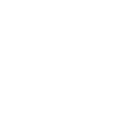

In [12]:
from IPython.display import display
display(images[0])

In [13]:
queries = [
    "What is the organizational structure for our R&D department?",
    "Can you provide a breakdown of last year’s financial performance?",
]

# Process the inputs
batch_images = processor.process_images(images).to(model.device)
batch_queries = processor.process_queries(queries).to(model.device)

In [20]:
print(batch_queries['input_ids'].shape)
print(batch_images['input_ids'].shape)

torch.Size([2, 22])
torch.Size([2, 36])


In [21]:
print(batch_queries)

{'input_ids': tensor([[151643,   3838,    374,    279,  40195,   5944,    369,   1039,    431,
          32365,   9292,     30, 151643, 151643, 151643, 151643, 151643, 151643,
         151643, 151643, 151643, 151643],
        [  6713,    498,   3410,    264,  29985,    315,   1537,   1042,    748,
           5896,   5068,     30, 151643, 151643, 151643, 151643, 151643, 151643,
         151643, 151643, 151643, 151643]], device='cuda:0'), 'attention_mask': tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}


In [22]:
# Forward pass
with torch.no_grad():
    image_embeddings = model(**batch_images)
    query_embeddings = model(**batch_queries)

scores = processor.score_multi_vector(query_embeddings, image_embeddings)

In [24]:
image_embeddings.shape

torch.Size([2, 36, 128])

In [23]:
scores

tensor([[5.1875, 5.0000],
        [4.5000, 4.5312]])